# Boundary value problem

### In general case:

$L[y]=y''+p(x)y+q(x)y=f(x)$

$l_a[y]=\alpha_0y(a)+\alpha_1y'(a)=A$

$l_b[y]=\beta_0y(b)+\beta_1y'(b)=B$

for $x\in[a,b]$

## 1. Consider the following boundary value problem:

$\frac{d^2y}{dx^2}-\frac{dy}{dx}\ln(x)-2y=1$ for $x \in [0.5,1.5]$

### with the boundary conditions:

$y(0.5)+y'(0.5)=1$, $y(1.5)-y'(1.5)=0$

1.1. Solve this problem using finite difference method of the second order. Use the uniform grid. Is this method stable for step size $h=0.125$? Find number of grid points required to achieve accuracy of the order of 1e-6.

### *Don't forget to include the boundary conditions!*

1.2. Use the first order one-sided numerical approximation for the first derivative and write a new scheme. Find number of grid points required to achieve accuracy of the order of 1e-6.

1.3. Plot the solutions of both methods on the same figure. Compare results and discuss differences (if occurs).

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import solve
from scipy.integrate import quad

#1.1.
def SecondOrderScheme(a,b,A,B,alpha,beta,p,q,f,N=100):
    # in:
    # a,b - float, limits of x, N - int, number of grid points
    # A,B - float, boundary values
    # alpha, beta - array of float, coefficients for boundary conditions in general case
    # p(x), g(x), f(x) - functions from general equation
    
    #you can construct matrix of the system and use scipy.linalg.solve method to solve it: y=solve(M,f)
    
    # out: 
    # y - array of float, solution of the BVP
    grid = np.linspace(a, b, N)
    grid_p = np.ones(N) * p(grid)
    grid_q = np.ones(N) * q(grid)
    grid_f = np.ones(N) * f(grid)
    
    delta = grid[1] - grid[0]
    
    crit = np.max(abs(grid_p * delta))
    if crit >= 2:
         print("Unstable")
     
    ai = delta * grid_p / 2
    ai = float(1) - ai
    ai[len(ai) - 1] = beta[0] * delta
    ai[len(ai) - 1] *= -2
    
    bi = (delta ** 2) * grid_q
    bi -= 2
    bi[0] = (delta ** 2) * alpha[1]
    bi[0] -= 3/2 * alpha[0] * delta
    bi[len(bi) - 1] = (delta ** 2) * beta[1]
    bi[len(bi) - 1] += 3/2 * beta[0] * delta
    
    ci = delta * grid_p / 2
    ci = float(1) + ci
    ci[0] = delta * alpha[0]
    ci[0] *= 2

    limit = np.arange(len(ci) - 1)
    lhs = np.diag(bi)
    lhs[limit, limit + 1] = ci[:-1]
    lhs[limit + 1, limit] = ai[1:]
    lhs[0, 2] = delta * alpha[0] * (-1/2)
    lhs[-1, -3] = delta * beta[0] * (1/2)
    
    rhs = (delta ** 2) * grid_f
    rhs[0] = (delta ** 2) * A
    rhs[len(rhs) - 1] = (delta ** 2) * B

    y = solve(lhs, rhs)
    
    return y

#1.2.
def FirstOrderScheme(a,b,A,B,alpha,beta,p,q,f,N=100):
    # in:
    # a,b - float, limits of x, N - int, number of grid points
    # A,B - float, boundary values
    # alpha, beta - array of float, coefficients for boundary conditions in general case
    # p(x), g(x), f(x) - functions from general equation
    
    #you can construct matrix of the system and use scipy.linalg.solve method to solve it: y=solve(M,f)
    
    # out: 
    # y - array of float, solution of the BVP
    grid = np.linspace(a, b, N)
    grid_p = np.ones(N) * p(grid)
    grid_q = np.ones(N) * q(grid)
    grid_f = np.ones(N) * f(grid)
    
    delta = grid[1] - grid[0]
    
    crit = np.max(abs(grid_p * delta))
    if crit >= 1:
         print("Unstable")
     
    ai = np.ones_like(grid)
    ai[len(ai) - 1] = -beta[0] * delta
    
    bi = (delta ** 2) * grid_q
    bi -= delta * grid_p
    bi -= 2
    bi[0] = (delta ** 2) * alpha[1]
    bi[0] -= delta * alpha[0]
    bi[len(bi) - 1] = (delta ** 2) * beta[1]
    bi[len(bi) - 1] += delta * beta[0]
    
    ci = delta * grid_p
    ci = float(1) + ci
    ci[0] = delta * alpha[0]

    limit = np.arange(len(ci) - 1)
    lhs = np.diag(bi)
    lhs[limit, limit + 1] = ci[:-1]
    lhs[limit + 1, limit] = ai[1:]
    
    rhs = (delta ** 2) * grid_f
    rhs[0] = (delta ** 2) * A
    rhs[len(rhs) - 1] = (delta ** 2) * B

    y = solve(lhs, rhs)
    
    return y

In [0]:
def p(x):
    return -np.log(x)

def q(x):
    return -2. * np.ones_like(x)

def f(x):
    return 1.

def count_accuracy(scheme, a, b, A, B, alpha, beta, p, q, f, acc):
    n = 100
    solution = scheme(a,b,A,B,alpha,beta,p,q,f,n)
    while True:
        n = 2 * n - 1
        current = scheme(a,b,A,B,alpha,beta,p,q,f,n)
        if np.max(abs(current[::2] - solution[:])) < acc:
            break
        solution = current
    return n

In [3]:
#forTest
a = 0.5
b = 1.5
A = 1.
B = 0.
alpha = [1., 1.]
beta = [1., -1.]

#Test implementation
first_res = count_accuracy(FirstOrderScheme, a, b, A, B, alpha, beta, p, q, f, acc=5*1e-2)
print("Кол-во точек для FirstOrderScheme: " + str(first_res))
second_res = count_accuracy(SecondOrderScheme, a, b, A, B, alpha, beta, p, q, f, acc=1e-2)
print("Кол-во точек для SecondOrderScheme: " + str(second_res))

Кол-во точек для FirstOrderScheme: 6337
Кол-во точек для SecondOrderScheme: 397


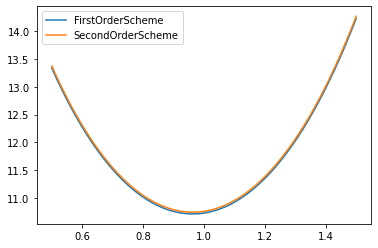

In [4]:
first_grid = np.linspace(a, b, first_res)
second_grid = np.linspace(a, b, second_res)

res1 = FirstOrderScheme(a, b, A, B, alpha, beta, p, q, f, first_res)
res2 = SecondOrderScheme(a, b, A, B, alpha, beta, p, q, f, second_res)

plt.plot(first_grid, res1, label="FirstOrderScheme")
plt.plot(second_grid, res2, label="SecondOrderScheme")
plt.legend()
plt.show()

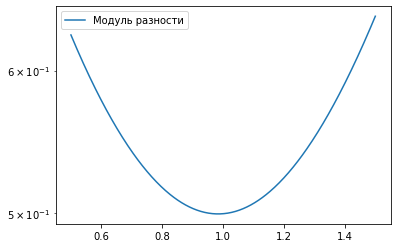

In [5]:
res = FirstOrderScheme(a, b, A, B, alpha, beta, p, q, f, second_res)
plt.plot(second_grid, abs(res - res2), label="Модуль разности")
plt.legend()
plt.yscale("Log")
plt.show()

# 2. Consider the following boundary value problem:

$\frac{d^2y}{dx^2}+2\frac{dy}{dx}-3xy=\frac{2-8x}{x^3}$ for $x \in [1,2]$

### with the boundary conditions:

$y(1)=1$, $y(2)=0.5$

2.1. Solve this problem using finite difference method of the second order. Find number of grid points required to achieve accuracy of the order of 1e-6.

2.2. Solve this problem using Galerkin method with power basis functions. Find number of grid points required to achieve accuracy of the order of 1e-6.

2.3. Plot the solutions of both methods on the same figure. Compare results and discuss differences (if occurs).

In [0]:
def f1(x):
    return (2 - 8 * x) / x**3

def p1(x):
    return 2

def q1(x):
    return -3 * x

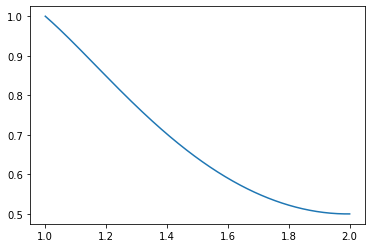

Число точек для SecondOrderScheme: 397


In [7]:
#forTest
a1 = 1.
b1 = 2.
A1 = 1.
B1 = 0.5
alpha1 = [0., 1.]
beta1 = [0., 1.]

acc1=1e-6
N = count_accuracy(SecondOrderScheme, a1, b1, A1, B1, alpha1, beta1, p1, q1, f1, acc=acc1)

f_opt = SecondOrderScheme(a1, b1, A1, B1, alpha1, beta1, p1, q1, f1, N)

plt.plot(np.linspace(a1, b1, N), f_opt)
plt.show()
print("Число точек для SecondOrderScheme: " + str(N))

In [0]:
def bas(x, n):
    if n==0:
        return 3/2-x/2
    return (-2 + x)*(-1 + x)*(-1 + 1/n + x)**(n - 1)

def dbas(x, n):
    if n==0:
        return -1/2
    res = (-1 + n)*(-2 + x)*(-1 + x)*(-1 + 1/n + x)**(-2 + n)
    res += (-2 + x)*(-1 + 1/n + x)**(-1 + n)
    res += (-1 + x)*(-1 + 1/n + x)**(-1 + n)
    return res

def ddbas(x, n):
    if n==0:
        return 0.
    res = (-2 + n)*(-1 + n)*(-2 + x)*(-1 + x)*(-1 + 1/n + x)**(-3 + n)
    res += 2*(-1 + 1/n + x)**(-1 + n)
    res += 2*(-1 + n)*(-1 + 1/n + x)**(-2 + n)*(-3 + 2*x)
    return res

def aik(i, j):
    return quad(lambda x:(ddbas(x,j)+2*dbas(x,j)-3*x*bas(x,j))*bas(x,i),a1,b1)[0]

def bi(i):
    return quad(lambda x:( (2-8*x)/x**3-(ddbas(x,0)+2*dbas(x,0)-3*x*bas(x,0)))*bas(x,i),a1,b1)[0]

q = 4
lhs = np.zeros([q,q])
rhs = np.empty(q)

for i in range(q):
    rhs[i] = bi(i+1)
    for j in range(q):
        lhs[i,j] = aik(i+1,j+1)

sols = solve(lhs,rhs)
grid_gal = np.linspace(a1,b1, N)
y = bas(grid_gal,0)
for i in range(q):
    y += sols[i]*bas(grid_gal,i+1)

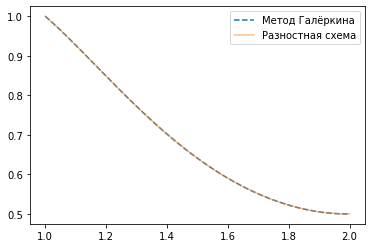

In [12]:
plt.plot(grid_gal, y, "--", label = "Метод Галёркина")
plt.plot(np.linspace(a1, b1, N), f_opt, label = "Разностная схема", alpha=0.5)
plt.legend()
plt.show()

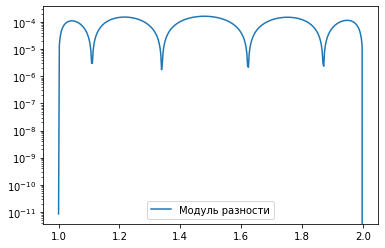

In [13]:
plt.plot(np.linspace(a1, b1, N), abs(y - f_opt), label ="Модуль разности")
plt.yscale("Log")
plt.legend()
plt.show()

In [14]:
q = 1

lhs = np.zeros([q, q])
rhs = np.empty(q)

for i in range(q):
    rhs[i] = bi(i + 1)
    for j in range(q):
        lhs[i, j] = aik(i + 1, j + 1)

sols = solve(lhs, rhs)
grid_gal = np.linspace(a1, b1, N)
y = bas(grid_gal, 0)

for i in range(q):
    y += sols[i] * bas(grid_gal, i+1)
    
while np.linalg.norm(y - f_opt) > 10 * acc1:
    q += 1
    lhs = np.zeros([q,q])
    rhs = np.empty(q)
    
    for i in range(q):
        rhs[i] = bi(i + 1)
        for j in range(q):
            lhs[i,j] = aik(i + 1, j + 1)
    
    sols = solve(lhs, rhs)
    grid_gal = np.linspace(a1, b1, N)
    y = bas(grid_gal,0)
    for i in range(q):
        y += sols[i] * bas(grid_gal, i + 1)
    print(q)

print("Базисных функций: " + str(q))

2
3
4
5
6
7
Базисных функций: 7


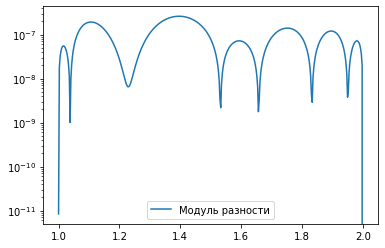

In [15]:
plt.plot(np.linspace(a1, b1, N), abs(y - f_opt), label ="Модуль разности")
plt.yscale("Log")
plt.legend()
plt.show()